# Demonstrating Gradient Descent using Linear Regression
This is a response to Siraj's Challenge to implement gradient descent to find the line of best fit that predicts the relationship between 2 variables from a kaggle dataset.

In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.animation as animation
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

%matplotlib inline

## Data Preparation

In [3]:
# Importing csv dataset with pandas
data = pd.read_csv('kc_house_data.csv')

# Using the first 10000 rows for training
data = data[:10000]

# Looking at the first 5 rows of dataset
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


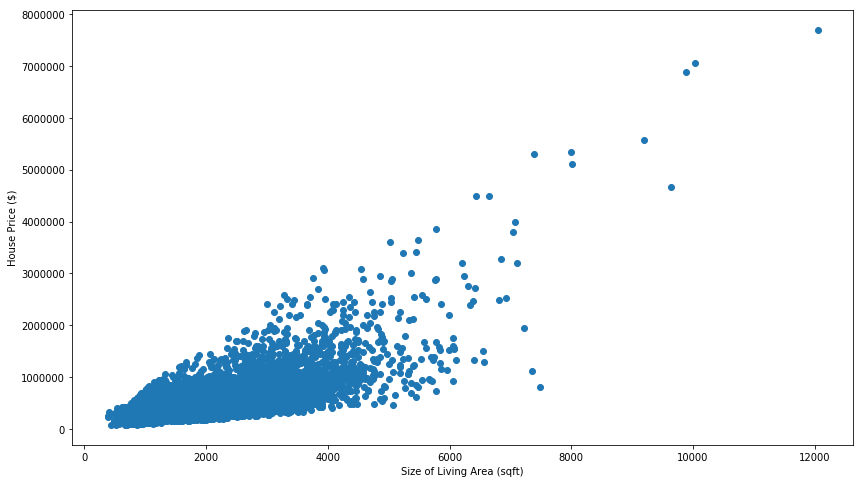

In [4]:
# Using sqft_living as X_values and price as Y_values, we want to predict the price
# of a house given the lot size in King's County
points = data.as_matrix(['sqft_living', 'price'])

# Looking at the plot of the points, we can see a linear trend 
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel('Size of Living Area (sqft)')
ax.set_ylabel('House Price ($)')
plt.scatter(points[:,0], points[:,1])
plt.show()

## Linear Regression and Gradient Descent
Over here, we define a function to compute the mean squared error, as shown below. The goal of linear regression is to minimise this error, which is termed as the cost function.

![Sum of Squared Error](https://spin.atomicobject.com/wp-content/uploads/linear_regression_error1.png)

In [5]:
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

Here, we define a step function to:
1. compute the gradients of b and m, for each data point, according to the partial derivative formulas.
2. update the current b and m values using the product of learning rate and gradients of b and m.
![Partial Derivative](https://spin.atomicobject.com/wp-content/uploads/linear_regression_gradient1.png)

In [6]:
def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

In [7]:
def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, np.array(points), learning_rate)
        # Every 100 iterations, prints b and m and error
        if i % 100 == 0:
            print('Iteration {}, b:{}, m:{}, error:{}'.format(i, b, m, compute_error_for_line_given_points(b, m, points)))
    return [b, m]

def run(lr, num_iter):
    learning_rate = lr
    initial_b = 0 # initial y-intercept guess
    initial_m = 0 # initial slope guess
    num_iterations = num_iter
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    return b, m

# Predicts y, given x
def predict(b, m, x_values):
    predicted_y = list()
    for x in x_values:
        y = m * x + b
        predicted_y.append(y)
    return predicted_y

In [8]:
# Hyperparameters
learning_rate = 0.0000001
iterations = 1000

b, m = run(learning_rate, iterations)

Starting gradient descent at b = 0, m = 0, error = 426386764825.6594
Running...
Iteration 0, b:0.10666231912000015, m:267.1946350253203, error:72648911453.93492
Iteration 100, b:-0.10107037499020075, m:264.80084200349273, error:72619994901.2326
Iteration 200, b:-0.307828244687345, m:264.80092613977877, error:72619990626.35063
Iteration 300, b:-0.5145854339497578, m:264.80101027578786, error:72619986351.49591
Iteration 400, b:-0.7213419427796791, m:264.80109441152007, error:72619982076.67029
Iteration 500, b:-0.9280977711793482, m:264.80117854697545, error:72619977801.87215
Iteration 600, b:-1.1348529191510028, m:264.8012626821539, error:72619973527.10263
Iteration 700, b:-1.3416073866968836, m:264.80134681705545, error:72619969252.361
Iteration 800, b:-1.5483611738192304, m:264.8014309516802, error:72619964977.64726
Iteration 900, b:-1.7551142805202804, m:264.80151508602796, error:72619960702.96205
After 1000 iterations b = -1.9597991859075228, m = 264.80159837875954, error = 726199564

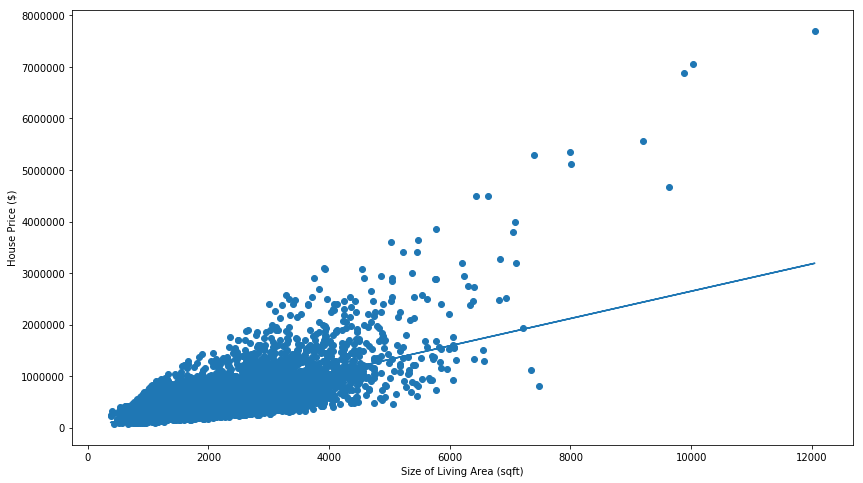

In [9]:
# Comparing best-fit line with dataset
f, ax = plt.subplots(figsize=(14, 8))
ax.set_xlabel('Size of Living Area (sqft)')
ax.set_ylabel('House Price ($)')
plt.plot(points[:,0], predict(b, m, points[:,0]))
plt.scatter(points[:,0], points[:,1])
plt.show()

## Prediction
Using the learned b and m, we can predict the price of any house in King's County!

In [10]:
living_size = 2000 # Change this variable
price = predict(b, m, [living_size])
print("Price predicted for a house with living size of {} sqft in King's County is ${}".format(living_size, price[0]))

Price predicted for a house with living size of 2000 sqft in King's County is $529601.2369583332


## Visualisation of Gradients

### 3D Surface Plot
The red star indicates the gradient of the best-fit line found above.

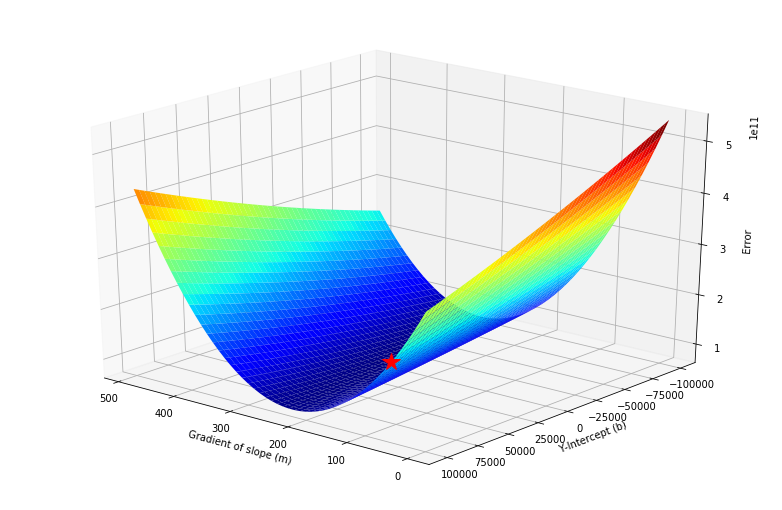

In [11]:
m_array = np.arange(0,500,10)
b_array = np.arange(100000,-100000,-1000)
X, Y = np.meshgrid(m_array, b_array)
f  = lambda m, b: compute_error_for_line_given_points(b, m, points[:10000])
Z = f(X,Y)

fig = plt.figure(figsize=(30,9))
ax = fig.add_subplot(122, projection='3d', elev=25, azim=130)

ax.plot_surface(X, Y, Z, cmap=plt.cm.jet)
ax.plot([m], [b], f(m,b),'r*', markersize=18)

ax.set_xlabel('Gradient of slope (m)')
ax.set_ylabel('Y-Intercept (b)')
ax.set_zlabel('Error')

plt.show()

### 2D Contour Plot

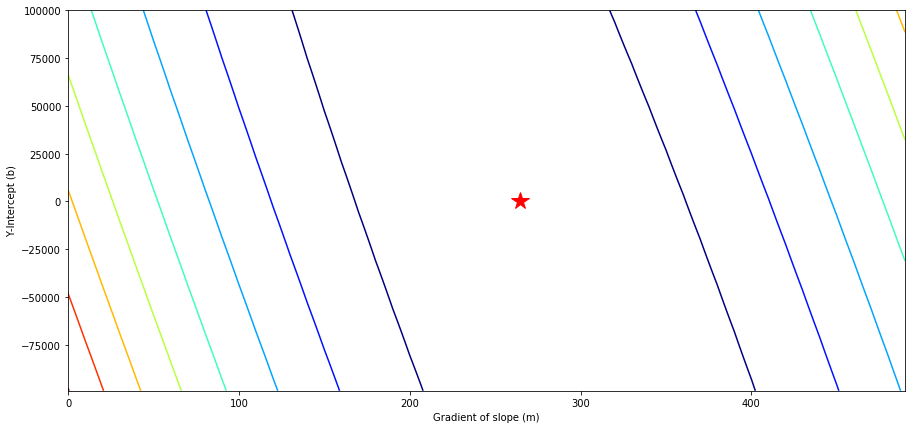

In [12]:
fig, ax = plt.subplots(figsize=(15, 7))

ax.contour(X, Y, Z, cmap=plt.cm.jet)
ax.plot(m, b, 'r*', 10, markersize=18)

ax.set_xlabel('Gradient of slope (m)')
ax.set_ylabel('Y-Intercept (b)')
plt.show()

In [13]:
import quandl
#

In [14]:
mydata = quandl.get("FRED/GDP")

In [18]:
len(mydata)

283

In [19]:
q = quandl.get("ZILLOW/N11919_MLPFSF", authtoken="HDbZ7wCGCjQsnaZiAy3Z")

In [20]:
q.head(10)

,Value
Date,
2015-05-31,393.141457
2015-06-30,405.351351
2015-07-31,391.524857
2015-08-31,389.908257
2015-09-30,384.858723
2015-10-31,384.858723
2015-11-30,393.578904
2015-12-31,398.144259
2016-01-31,393.390288


In [21]:
len(q)

30